## Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя **sns.countplot** (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
**user_data:**

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

**logs:**

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

**1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.**

**Вопрос:** Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd
user_data = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Miniprojects/Miniproject_2/3_user_data.csv')
logs = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Miniprojects/Miniproject_2/3_logs.csv')

In [2]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [6]:
logs.platform.nunique()

3

Ответ: 3

**2. Какой клиент совершил больше всего успешных операций?**

**Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:**

12, 123, 456

In [7]:
success_counts = logs.loc[logs.success == True].client.value_counts()
max_num = success_counts.max()
max_success_users = success_counts.loc[success_counts == max_num]
max_success_users

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

In [8]:
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

Ответ: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

**3. С какой платформы осуществляется наибольшее количество успешных операций?**

In [9]:
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

* Computer
* Web
* **Phone**
* Tablet

**4. Какая платформа наиболее популярна среди премиумных клиентов?**

In [10]:
premium_logs = logs.merge(user_data, on='client')
premium_logs.loc[premium_logs.premium == True].platform.value_counts().idxmax()

'phone'

* Tablet
* **Phone**
* Web
* Computer

**5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?**

**Используйте датасэт, который вы получили на предыдущем шаге**

![](https://ucarecdn.com/6312cd54-c828-4712-a002-b0a895159f61/)

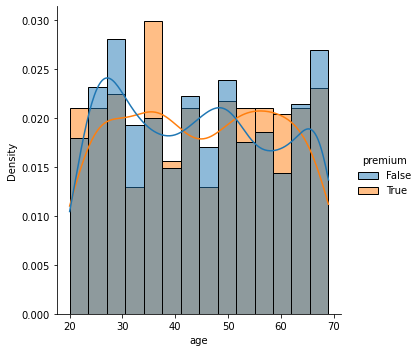

In [12]:
import seaborn as sns
sns.displot(data=premium_logs, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)
sns.despine()

* A
* **B**
* C
* D

**6. Постройте график распределения числа успешных операций:**

x – число успешных операций

y – число клиентов, совершивших столько успешных операций

In [17]:
success_count = logs.loc[logs.success == True].client.value_counts()
success_count = success_count.rename('successes')
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successes, Length: 2845, dtype: int64

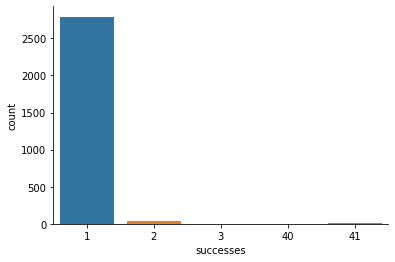

In [18]:
sns.countplot(x=success_count)
sns.despine()

* **Несколько клиентов совершили более 40 успешных действий**
* Все клиенты совершили не более 5 успешных операций
* Бóльшая часть наблюдений сосредоточена в правой части графика
* **Бóльшая часть наблюдений сосредоточена в левой части графика**

**7. ⭐️Задание со звёздочкой!⭐️**

**Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.**

Полезные ссылки:

[sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) – документация к типу графика

[figsize](https://lab.karpov.courses/learning/88/module/1103/lesson/9728/28498/133083/) – про размер графиков

**Вопрос**: Клиенты какого возраста совершили наибольшее количество успешных действий?

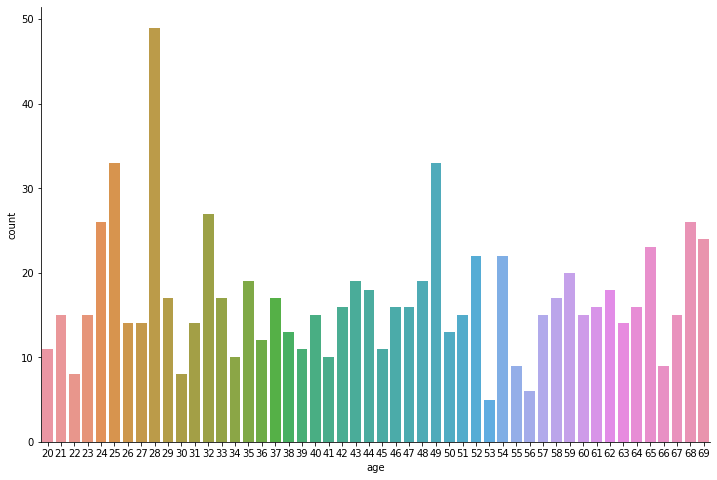

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer')
                                   & (premium_logs.success == True)], 
             x='age')
sns.despine()

Ответ: 28